In [1]:
import numpy as np
import pandas as pd


In [2]:
#loading the csv file pet_supplies_2212
data=pd.read_csv('pet_supplies_2212.csv')
#the info() function is used to get information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   object 
 5   sales            1500 non-null   float64
 6   rating           1350 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB


In [3]:
#here we display the first ten rows of the dataset
data.head(10)

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1
5,6,Housing,Dog,Small,30.77,874.58,7.0,0
6,7,Housing,Dog,Small,31.04,875.07,5.0,0
7,8,Toys,Cat,medium,28.9,1074.31,4.0,0
8,9,Equipment,Fish,MEDIUM,17.82,503.67,5.0,0
9,10,Medicine,Dog,medium,24.93,838.88,8.0,0


In [4]:
#checking for null values in the dataset
#we can see that only the rating column has null values
data.isna().sum()

product_id           0
category             0
animal               0
size                 0
price                0
sales                0
rating             150
repeat_purchase      0
dtype: int64

In [5]:
#displaying the column price in the dataframe data
data['price']

0        51.1
1       35.98
2       31.23
3       24.95
4       26.18
        ...  
1495    40.91
1496    32.89
1497    25.79
1498    19.94
1499    25.95
Name: price, Length: 1500, dtype: object

In [6]:
#counting the number of unique elements in each column of the dataframe
#we display it as a dictionary with the columns as keys and the count of unique elements as values
unique_elements={c: len(data[c].unique()) for c in data}
unique_elements

{'product_id': 1500,
 'category': 7,
 'animal': 4,
 'size': 9,
 'price': 707,
 'sales': 1476,
 'rating': 10,
 'repeat_purchase': 2}

In [7]:
#we drop here the columns product_id, price and sales
data1= data.drop(['product_id', 'price', 'sales'], axis=1)
#data1 is now a new dataframe that is just data without the three columns listed above
#Now we list here all the unique elements for the columns in data1
listing_unique_elements={c: data1[c].unique() for c in data1}
listing_unique_elements

{'category': array(['Food', 'Housing', 'Medicine', 'Toys', 'Equipment', 'Accessory',
        '-'], dtype=object),
 'animal': array(['Bird', 'Dog', 'Cat', 'Fish'], dtype=object),
 'size': array(['large', 'MEDIUM', 'medium', 'small', 'Small', 'Large', 'SMALL',
        'Medium', 'LARGE'], dtype=object),
 'rating': array([ 7.,  6.,  5.,  4.,  8.,  1.,  3., nan,  2.,  9.]),
 'repeat_purchase': array([1, 0])}

<Axes: xlabel='category'>

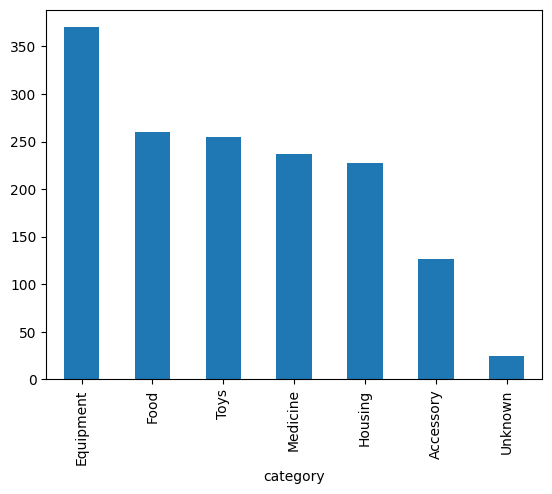

In [8]:
ind= data[data['category']=='-'].index
data.loc[ind ,'category'] = 'Unknown'
data['category'].value_counts().plot(kind='bar')

In [9]:
#we list here all the unique elements in the price column to see if all the values are numeric or not
#we see that there is a value 'unlisted' in this column
#we need to change it otherwise, we cannot convert the values in this column to floats
unique_prices=data['price'].unique()
unique_prices

array(['51.1', '35.98', '31.23', '24.95', '26.18', '30.77', '31.04',
       '28.9', '17.82', '24.93', '40.87', '34.96', '31.07', '40.8',
       '33.13', '43.09', '28.29', '43.91', '33.87', '44', 'unlisted',
       '41', '32.98', '22.99', '38.99', '45.83', '28.24', '28.19',
       '27.79', '38.86', '22.89', '26.07', '28.02', '23.99', '28.25',
       '30.87', '28.09', '29.01', '26.13', '54.03', '31.2', '30.92',
       '20.95', '17.98', '27.7', '24.8', '31.09', '19.83', '33.15',
       '21.25', '38.06', '30.89', '35.04', '26.03', '33.94', '25.81',
       '32.99', '17.9', '30.96', '40.93', '24.98', '26.08', '23.08', '26',
       '22.95', '39.03', '23.19', '31', '21.05', '31.5', '24.7', '27.76',
       '18.06', '28.43', '43.99', '41.03', '28.28', '25.96', '27.86',
       '38.95', '36.22', '23.02', '21.14', '42.99', '27.95', '38', '28.2',
       '39.16', '25.07', '15', '35.95', '30.03', '22.98', '27.97',
       '28.74', '26.05', '45.99', '25.83', '22.75', '28.03', '29.02',
       '26.32', '2

In [10]:
#here we extract the row indices of all 'unlisted' values in the column price
index_unlisted=np.array(data[data['price']=='unlisted'].index)
index_unlisted


array([  20,   44,   46,   70,   73,   84,   89,   94,  100,  110,  116,
        120,  127,  131,  132,  133,  134,  135,  140,  158,  186,  193,
        200,  209,  211,  218,  230,  235,  249,  256,  265,  276,  278,
        285,  286,  288,  297,  306,  312,  319,  328,  346,  360,  369,
        374,  393,  394,  405,  414,  426,  470,  471,  481,  482,  491,
        500,  503,  521,  537,  538,  564,  565,  570,  577,  591,  594,
        601,  605,  619,  623,  626,  651,  664,  691,  693,  703,  708,
        713,  723,  729,  737,  743,  747,  748,  765,  790,  800,  807,
        885,  886,  889,  894,  910,  923,  924,  938,  940,  977,  982,
        989,  990,  999, 1004, 1007, 1017, 1050, 1055, 1061, 1077, 1123,
       1145, 1147, 1148, 1165, 1173, 1174, 1185, 1191, 1196, 1202, 1209,
       1217, 1222, 1233, 1239, 1251, 1258, 1273, 1278, 1293, 1304, 1305,
       1342, 1353, 1363, 1376, 1377, 1391, 1394, 1395, 1400, 1405, 1408,
       1433, 1435, 1447, 1469, 1471, 1476, 1483])

In [11]:
#here we drop all the rows having it's index in index_unlisted
data2=data.drop(index_unlisted, axis=0)
#we convert all of the other values in the price column to floats and then calculate their median
data2['price']=data2['price'].astype(float)
np.median(data2['price'])

28.064999999999998

In [12]:
#we replace all of the unlisted values with the median calculated above
data.loc[index_unlisted, 'price']=28.07
#we also convert the values in the sales column to floats(there are no non numeric values in this column)
data['sales']=data['sales'].astype(float)

In [13]:
#here, we get an array of the indices of nan values in the rating column
D= np.array(data[data['rating'].isna()].index)

In [14]:
#here we replace all of this values with 0
data.loc[D, 'rating']= 0
#an alternative way to do this is put as a comment in the box below

In [15]:
#data['rating'] = data['rating'].fillna(0)

In [16]:
#here we import the required visualisation tools matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'counts of products purchased repeatedly or not')

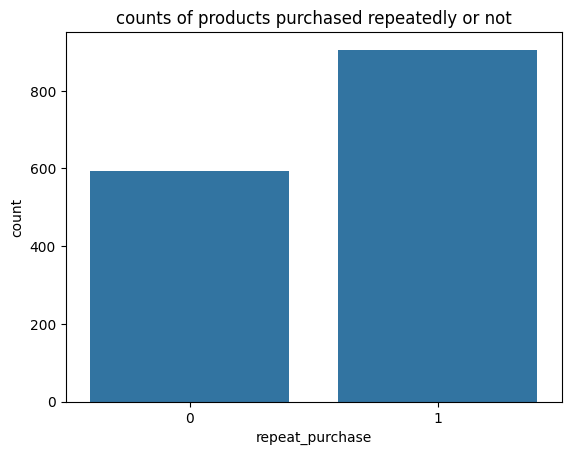

In [17]:
#here we plot a graph showing the two categories of values in the repeat purchase column
sns.countplot(x=data['repeat_purchase'])
plt.title('counts of products purchased repeatedly or not')


We can see from the above countplot that there are more products under category 1(that is products on repeat purchase) than there are under category 0(products not on repeat purchase)

Text(0.5, 1.0, 'distribution of sales')

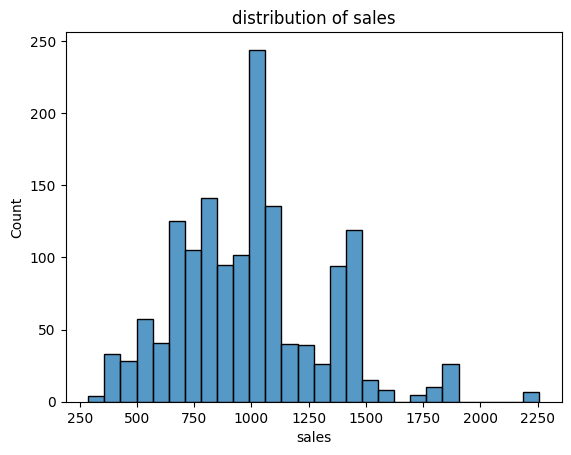

In [18]:
#we plot a histogram of sales to see how sales is distributed
sns.histplot(data['sales'])
plt.title('distribution of sales')

Text(0.5, 1.0, 'Boxplot of sales variable')

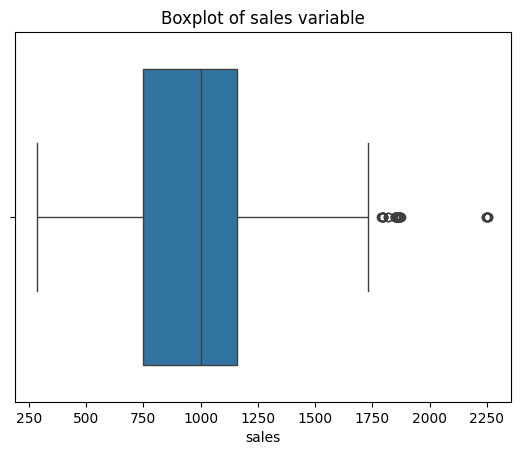

In [19]:
#boxplot of the sales variable
sns.boxplot(x=data['sales'])
plt.title('Boxplot of sales variable')

We see from the box plot above that the distribution is skewed to the right(if you look at the long lines outside the blue box, you can see that the right hand side line is longer). We also see that we have dotted values on the right. This values are called outliers(They differ so much from the rest of the data in the dataset). We can also see that the median of sales is around 1000(the blackline) which is greater than the mean(the middle of the box)

In [20]:
np.mean(data['sales']), np.median(data['sales'])

(996.5978466666667, 1000.8299999999999)

We can see from the graph above that most of the sales are between 500 and 1500 with all of the sales outside this range having counts significantly below 50. It is not really obvious how skewed the distribution is, so we give a boxplot of the sales column below.

Text(0.5, 1.0, 'Boxplot of repeat purchases and sales')

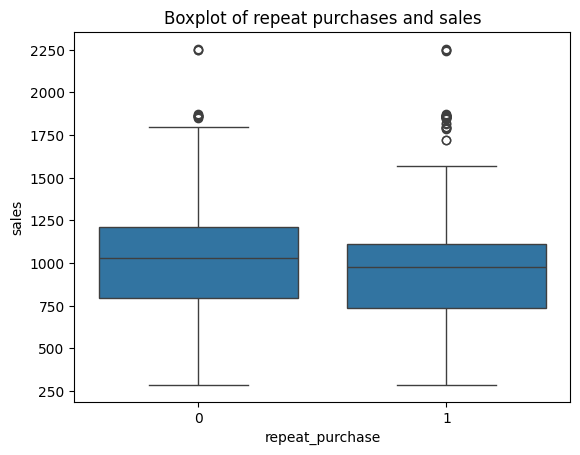

In [21]:
#here we give a boxplot of repeat purchase vs sales
sns.boxplot(x=data['repeat_purchase'], y=data['sales'])
plt.title('Boxplot of repeat purchases and sales')

<Axes: xlabel='product_id', ylabel='sales'>

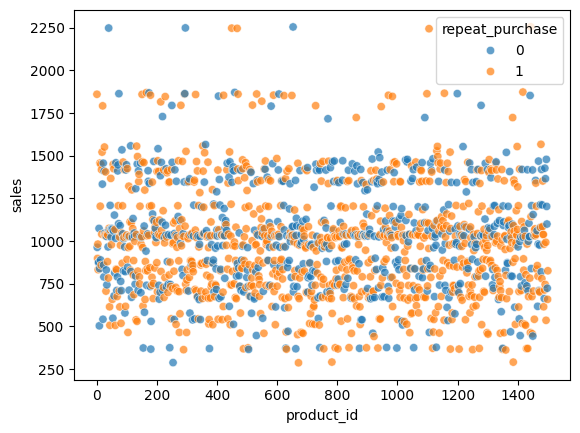

In [22]:
#scatterplot of product_id and sales to see if there is any correlation
#setting hue as repear_purchase gives a different colour for each category
sns.scatterplot(x=data['product_id'], y=data['sales'], hue=data['repeat_purchase'],alpha=0.7)

In [23]:
#Now, we need to see a pie chart of sales and repeat purchase to see which category of the
#products contribute more to the total sales
M=[np.sum(data[data['repeat_purchase']== 0]['sales']), np.sum(data[data['repeat_purchase']== 1]['sales'])]
N=[len(data[data['repeat_purchase']== 0]), len(data[data['repeat_purchase']== 1])]

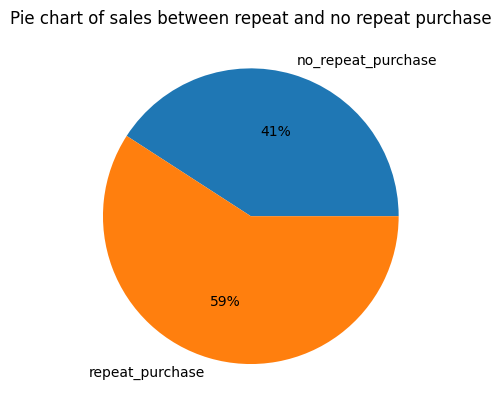

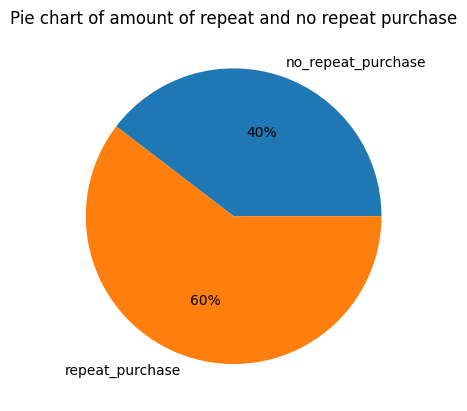

In [24]:

plt.pie(M, labels=['no_repeat_purchase','repeat_purchase'], autopct='%.0f%%')
plt.title('Pie chart of sales between repeat and no repeat purchase')
plt.show()
plt.pie(N, labels=['no_repeat_purchase','repeat_purchase'], autopct='%.0f%%')
plt.title('Pie chart of amount of repeat and no repeat purchase')
plt.show()